<a href="https://colab.research.google.com/github/yuningrumzattayu/Study-Machine-Learning/blob/main/Latihan_Model_Klasifikasi_Gambar_dengan_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# memastikan versi tflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
# mengunduh dataset
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-03-11 15:57:28--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 104.18.12.192, 104.18.13.192, 2606:4700::6812:dc0, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|104.18.12.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   292MB/s    in 0.2s    

2024-03-11 15:57:29 (292 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# mendefinisikan nama direktori untuk data latih dan data validasi.
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [5]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [7]:
# imageDataGenerator merupakan sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data validasi.
# proses augmentasi gambar ->  sebuah teknik yang dapat digunakan untuk memperbanyak data latih dengan cara menduplikasi gambar
# yang telah ada dengan menambahkan variasi tertentu
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')


Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
# membangun model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
# melihat summary arsitektur model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [12]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 16s - loss: 0.8287 - accuracy: 0.4800 - val_loss: 0.6903 - val_accuracy: 0.5000 - 16s/epoch - 629ms/step
Epoch 2/20
25/25 - 13s - loss: 0.6927 - accuracy: 0.5400 - val_loss: 0.6936 - val_accuracy: 0.5000 - 13s/epoch - 536ms/step
Epoch 3/20
25/25 - 13s - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5000 - 13s/epoch - 533ms/step
Epoch 4/20
25/25 - 13s - loss: 0.7015 - accuracy: 0.5100 - val_loss: 0.6922 - val_accuracy: 0.5000 - 13s/epoch - 528ms/step
Epoch 5/20
25/25 - 13s - loss: 0.6935 - accuracy: 0.4900 - val_loss: 0.6644 - val_accuracy: 0.7000 - 13s/epoch - 527ms/step
Epoch 6/20
25/25 - 13s - loss: 0.6960 - accuracy: 0.5800 - val_loss: 0.6904 - val_accuracy: 0.5000 - 13s/epoch - 530ms/step
Epoch 7/20
25/25 - 13s - loss: 0.6858 - accuracy: 0.5200 - val_loss: 0.6550 - val_accuracy: 0.8000 - 13s/epoch - 520ms/step
Epoch 8/20
25/25 - 13s - loss: 0.6457 - accuracy: 0.6700 - val_loss: 0.5738 - val_accuracy: 0.7500 - 13s/epoch - 530ms/step
Epoch 9/

Saving downloadd.jpg to downloadd.jpg
1/1 [==============================] - 0s 40ms/step
downloadd.jpg
messy


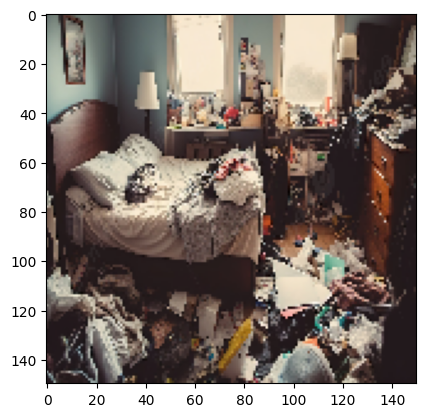

In [17]:
# Uji model dengan data baru
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')